# Exercicio 3 - Inversao de Funcoes de Receptor (GGF2013)

O objetivo deste exercicio e praticar a inversao de funcoes de receptor atraves da metodologia desenvolvida por Ammon et al.(1990).

<h3 align="center">  Importando os modolos utilizados:</h3> 

In [25]:
import numpy as np
import obspy as op
import os
import matplotlib.pyplot as mpl
import matplotlib.gridspec as gridspec
import linecache
import pandas as pd
%matplotlib inline

INSTRUÇÕES	
  
A	  inversão	  de	  funções	  de	  receptor	  com	  a	  metodologia	  de	  Ammon	  et	  al	  (1990)	  é	  feita	  através	  dos	  passos	  indicados	  abaixo:	  
	
  
1 -  Cálculo	  da	  função	  de	  receptor	  “verdadeira” 	

Seguir	   as	   instruções	   do	   exercício	   1	   para	   calcular	   funções	   de	  receptor	   para	   um	  modelo	   de	   Terra	   com	   uma	   crosta	   de	   duas	   camadas:	   $Vp_{1}$ =6.5	   km/s	   e	   $h_{1} =20$	   km,	  $Vp_{2} =6.8$	  km/s	  e	  $h_{2} =20$	  km,	  e	  um	 manto	  superior	  de	  Vp=8.1	  km/s.	  Assumir	  uma	  razão	  de	  Poisson	  de	  0,25	 para	  todas	  as	  camadas.	  Usar	  um	  filtro	  gaussiano	  de	  a=2.5.	  Usar	  “model.true”	  como	  nome	  de	  arquivo	  para	  o	  modelo	  de	  Terra	  e	  “model.true.eqr"	  para	  o	  arquivo	  contendo	  a	  função	  de	  receptor	  sintética.	  
  

In [3]:
vp_true = np.genfromtxt('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/3_Inversao_FR/model.true', skip_header=1)[:,1]
vp_true = np.append(vp_true[0],vp_true)
H_true = [0,20,40,50]

FReqr25 = op.read('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/3_Inversao_FR/model.true.eqr')
FReqr25 = FReqr25[0]

(-0.2, 0.5)

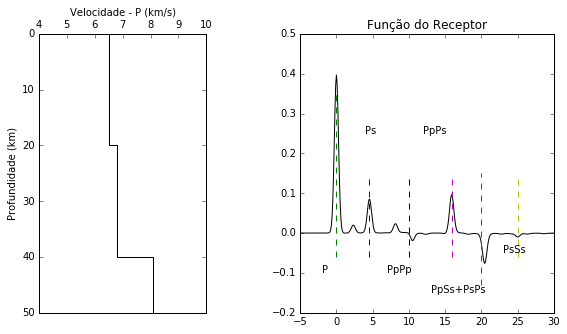

In [4]:
fig = mpl.figure(figsize = (10,5))

ax2 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

ax2.step(vp_true,H_true,'k',where='post')
ax2.set_xlabel('Velocidade - P (km/s)')
ax2.set_ylabel('Profundidade (km)')
ax2.xaxis.tick_top()
ax2.set_xlim([4,10])
ax2.set_ylim([50,0])
ax2.xaxis.set_label_position('top') 
ax2.set_aspect(0.2)

ax1.plot(FReqr25.times()-5,FReqr25.data,'k')
ax1.set_title('Função do Receptor')    
ax1.axvline(x=0, ymin=0.2, ymax=0.8, ls='dashed',c='g')
ax1.text(-2, -0.1, 'P')
ax1.axvline(x=4.5, ymin=0.2, ymax=0.5, ls='dashed',c='b')
ax1.text(4, 0.25, 'Ps')
ax1.axvline(x=10, ymin=0.2, ymax=0.5, ls='dashed',c='k')
ax1.text(7, -0.1, 'PpPp')    
ax1.axvline(x=16, ymin=0.2, ymax=0.5, ls='dashed',c='m')
ax1.text(12, 0.25, 'PpPs')
ax1.axvline(x=20, ymin=0.1, ymax=0.5, ls='dashed',c='r')    
ax1.text(13, -0.15, 'PpSs+PsPs')
ax1.axvline(x=25, ymin=0.2, ymax=0.5, ls='dashed',c='y')    
ax1.text(23, -0.05, 'PsSs')
ax1.set_xlim(-5,30)
ax1.set_ylim(-0.2,0.5)

2 - Modelo	  inicial	
  
	
  
Criar	  um	  modelo	  inicial	  com	  25	  camadas	  de	  velocidade	  7.0	  km/s	  e	  espessura	  2.0	  km.	  Assumir	   uma	   razão	   de	   Poisson	   de	   0,25	   para	   toda	   as	   camadas.	   Usar	   o	   nome	  “model.ini”	  para	  o	  modelo	  inicial.	  

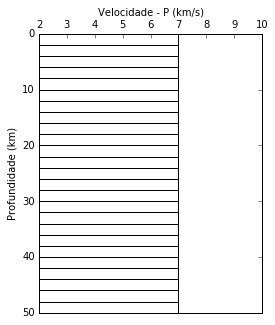

In [6]:
mpl.figure(figsize = (10,5))
ax2 = mpl.subplot()

for i in range(50):
    ax2.vlines(7,i,i+2)
    ax2.hlines(2*i,0,7)
    ax2.set_xlabel('Velocidade - P (km/s)')
    ax2.set_ylabel('Profundidade (km)')
    ax2.xaxis.tick_top()
    ax2.set_xlim([2,10])
    ax2.set_ylim([50,0])
    ax2.xaxis.set_label_position('top') 
    ax2.set_aspect(0.2)

3 - Determinar	  o	  parâmetro	  de	  suavidade	  (smthinv): 	
    
Fazer	   uma	   inversão	   preliminar	   usando	   o	   aplicativo	   “smthinv”	   para	   uma	   faixa	   de	  valores	   de	   suavidade	   entre	   0.0	   e	   1.0.	   Procurar	   o	   valor	   “fractional	   square	   misfit”	   e	   do	  “model	   roughness”	   para	   cada	   parâmetro	   de	   suavidade	   (pode	   achar	   no	   “output”	   do	  aplicativo).	

Em seguida,	  construir	  uma	  tabela	  com	  os	  valores	  de	  “fractional	  square	 misfit”,	  “model	  roughness”	   e	   “smoothness”.	   Escolha	   um	   parâmetro	   de	   suavidade	   e	   justifique	   sua	  escolha.	
  

In [9]:
smthinv_output = linecache.getlines('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/3_Inversao_FR/smthinv_output.txt')

Smoothness_rows = []
Smoothness_rows = np.arange(0,1521,127)

mr_indice = [36,52,67,82,97]
fsm_indice = [34,50,65,80,95]

model_roughness_rows = [] 
model_roughness_rows = [Smoothness_rows + i*np.ones_like(Smoothness_rows) for i in mr_indice]

fractional_square_misfit_rows = []
fractional_square_misfit_rows = [Smoothness_rows + i*np.ones_like(Smoothness_rows) for i in fsm_indice]

In [65]:
Smoothness_4_interation = [smthinv_output[i] for i in Smoothness_rows]

fractional_square_misfit_4_interation = [] 
for i in range(len(fractional_square_misfit_rows)):
    fractional_square_misfit_4_interation += [smthinv_output[k] for k in fractional_square_misfit_rows[i]]
    
model_roughness_4_interation = []
for i in range(len(model_roughness_rows)):
    model_roughness_4_interation += [smthinv_output[k] for k in model_roughness_rows[i]]

In [71]:

Smoothness_str

['  0.',
 '  0.1',
 '  0.2',
 '  0.3',
 '  0.4',
 '  0.5',
 '  0.6',
 '  0.7',
 '  0.8',
 '  0.90000004',
 '  1.',
 '  1.1']

In [70]:
Smoothness = []
Smoothness = [float(Smoothness_4_interation[i].split('=')[1]) for i in range(len(Smoothness_4_interation))]
Smoothness_str1 = [str(Smoothness_4_interation[i].split('=')[1]) for i in range(len(Smoothness_4_interation))]
Smoothness_str = [(Smoothness_str1[i].split('\n')[0]) for i in range(len(Smoothness_4_interation))]

fractional_square_misfit = []
for i,j in enumerate(fractional_square_misfit_4_interation):
    fractional_square_misfit += [float(j.split(':')[1])]

model_roughness_a = []
model_roughness_b = []
for i,j in enumerate(model_roughness_4_interation):
    model_roughness_a += [float(j.split(':')[1].split(' ')[1])]
    model_roughness_b += [float(j.split(':')[1].split(' ')[2])]
    
model_roughness_a = [model_roughness_a[i:i + 12] for i in range(0, len(model_roughness_a), 12)]
model_roughness_b = [model_roughness_b[i:i + 12] for i in range(0, len(model_roughness_b), 12)]
fractional_square_misfit = [fractional_square_misfit[i:i + 12] for i in range(0, len(fractional_square_misfit), 12)]

In [53]:
np.savetxt('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/3_Inversao_FR/table_smthinv.csv', np.transpose([fractional_square_misfit[4],model_roughness_a[4],model_roughness_b[4],Smoothness]),delimiter=',',header='fractional square misfit,model roughness a,model roughness b,Smoothness')

In [54]:
pd.read_csv('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/3_Inversao_FR/table_smthinv.csv')

,# fractional square misfit,model roughness a,model roughness b,Smoothness
0,0.014810,0.290632,0.167798,0.0
1,0.016191,0.247537,0.142917,0.1
2,0.020881,0.187422,0.108209,0.2
3,0.028092,0.143395,0.082790,0.3
4,0.034476,0.115008,0.066400,0.4
5,0.040565,0.095593,0.055191,0.5
6,0.047235,0.080593,0.046531,0.6
7,0.053369,0.068976,0.039824,0.7
8,0.057944,0.060240,0.034780,0.8
9,0.061435,0.053451,0.030860,0.9


<h2 align="justify"> 1. Construir   um	   gráfico	   para	   o	   “fractional	   misfit”	   (eixo	   y)	   em	   função	   do	   “model	   roughness”	  (eixo	   x).	   Indique	   o	   parâmetro	   de	   suavidade	 escolhido	   para	   a	   inversão	   completa	   da	  função	  de	  receptor.	 </h2>  

#### Abaixo pode-se ver o gráfico do "fractional misfit" em relação ao "model roughness" para todas as etapas da inversão feita pelo programa smthinv. 

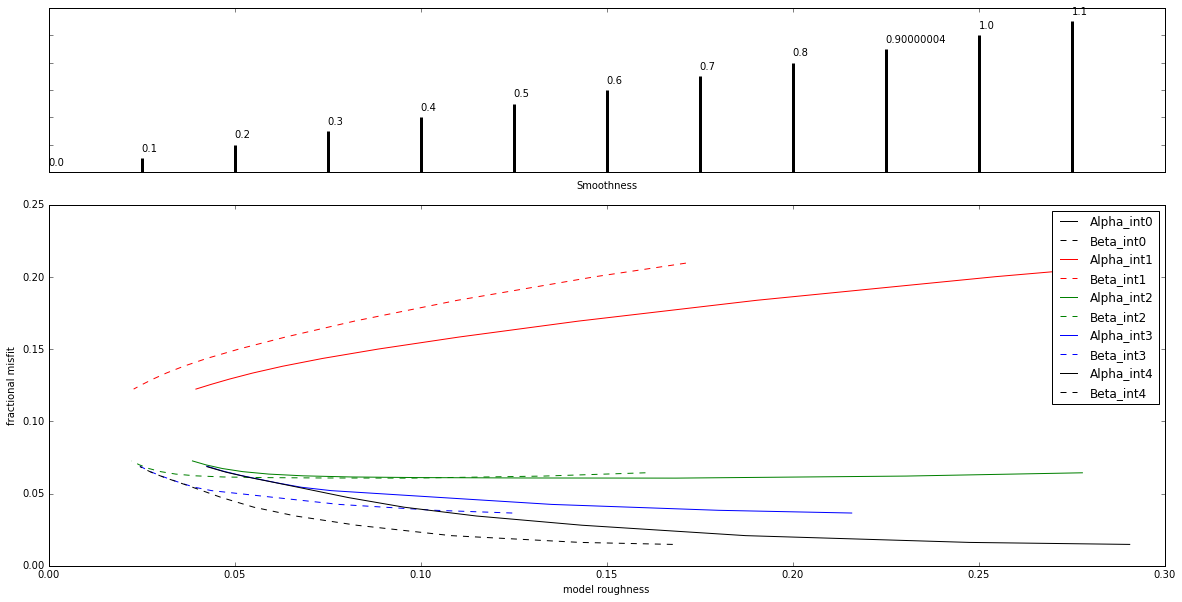

In [55]:
colora = ['k','r','g','b','k']
colorb = ['--k','--r','--g','--b','--k']
labela = ['Alpha_int0','Alpha_int1','Alpha_int2','Alpha_int3','Alpha_int4']
labelb = ['Beta_int0','Beta_int1','Beta_int2','Beta_int3','Beta_int4']

mpl.figure(figsize = (20,10))
gs = gridspec.GridSpec(3,1)
gs.update(wspace=0.1, hspace=0.2)

ax2= mpl.subplot(gs[:1 :])
ax1= mpl.subplot(gs[-1, :-1])

for i in range(len(model_roughness_b)):
    ax1.plot(model_roughness_a[i],fractional_square_misfit[i],colora[i],label=labela[i])
    ax1.plot(model_roughness_b[i],fractional_square_misfit[i],colorb[i],label=labelb[i])
    ax1.legend()
    ax1.set_xlabel('model roughness')
    ax1.set_ylabel('fractional misfit')

for i,j in enumerate(Smoothness):
    ax2.vlines(i, [0], j,lw=3)
    ax2.text(i,j+0.05,str(j))
    ax2.set_xlabel('Smoothness')
    ax2.set_yticklabels([])
    ax2.set_xticklabels([])

In [58]:
Smoothness_str

'  0.\n'

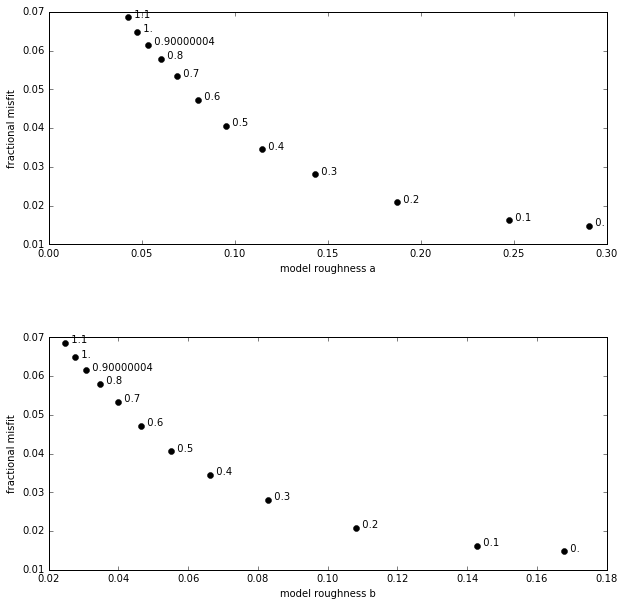

In [80]:
i = 4
mpl.figure(figsize = (10,10))
gs = gridspec.GridSpec(2,1)
gs.update(wspace=0.1, hspace=0.4)

for l in range(len(Smoothness)):
    ax1= mpl.subplot(gs[0])
    ax1.plot(model_roughness_a[i][l],fractional_square_misfit[i][l],'ok')
    ax1.text(model_roughness_a[i][l],fractional_square_misfit[i][l],Smoothness_str[l])
    ax1.set_xlabel('model roughness a')
    ax1.set_ylabel('fractional misfit')


for l in range(len(Smoothness)):
    ax2= mpl.subplot(gs[1])
    ax2.plot(model_roughness_b[i][l],fractional_square_misfit[i][l],'ok')
    ax2.text(model_roughness_b[i][l],fractional_square_misfit[i][l],Smoothness_str[l])
    ax2.set_xlabel('model roughness b')
    ax2.set_ylabel('fractional misfit')

#### Para escolher o melhor valor para o parâmetro de suavidade fez-se o gráfico do "fractionla misfit" em relação ao "model roughness" para ultima etapa de inversão calculada pelo programa smthinv, tal gráfico é chamado de gráfico da curva "L".   A curva  L naturalmente  justifica  o seu  nome por se assemelhar ao formato da letra L, e é caracterizada por uma inflexão, apresentada como a região de interesse, que separa as partes vertical e horizontal da curva.   A parte aproximadamente vertical da curva L corresponde às soluções muito sensíveis às mudanças do parâmetro de regularização, soluções dominadas pelo erro de perturbação.  Enquanto que a parte aproximadamente horizontal corresponde às soluções dominadas pelo erro de regularizalção, onde a norma residual é mais sensível aos parâmetros de regularização. Porntanto, para a escolha do melhor parâmetro de suavidade optou-se por escolher o parâmetro que está mais próximo da inflexão da curva abaixo. O parâmetro de suavidade escolhido foi de 0.3.

<h2 align="justify"> 2. Construir	   uma	   figura	   com	   os	   resultados	 da	   inversão	   “smthinv”	   para	   o    parâmetro	   de	  suavidade	   escolhido.	   A	   figura	   deve	   conter	   a	   função	   de	   receptor	   verdadeira	 (model.true.eqr),	  a	  função	  de	  receptor	  invertida	 (syn01.??04),	  e	 os	  modelos	  verdadeiro	(model.true)	  e	  invertido	  (inf.mdl.??.04).	</h2> 
  

Importando as Funções do Receptor e os modelos invertidos segundo o parâmetro de suavidade (smoth) escolhido:

In [87]:
smoth = '04'

In [88]:
inv_list = []
vp_model = []
syn_list = []
for root, dirs, files in os.walk('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/3_Inversao_FR/Exerc3_model/'):
    for RFfile in files:
        if RFfile.startswith('inv.mdl.'+smoth):
            inv_list.append(os.path.join(root, RFfile))
        if RFfile.startswith('syn01.'+smoth):
            syn_list.append(os.path.join(root, RFfile))
            
            
inv_listS = sorted(inv_list)
syn_listS = sorted(syn_list)
vp_model = [np.genfromtxt(i,skip_header=1,usecols=1) for i in inv_listS]
FRsyn = [op.read(i) for i in syn_listS]
H_model = np.arange(0,50,2)
vp_modellabel = [i.split('model/')[1] for i in inv_listS]
FRsynlabel = [i.split('model/')[1] for i in syn_listS]

Plotando as Funções do Receptor e os modelos invertidos segundo o parâmetro de suavidade (smoth) escolhido:

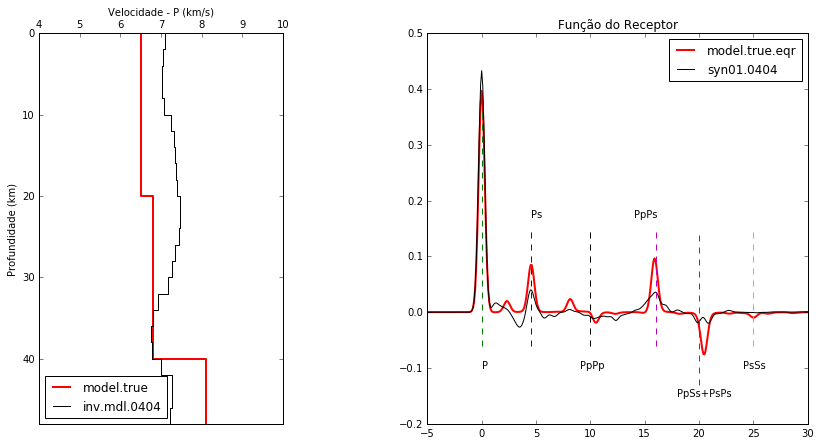

In [89]:
fig = mpl.figure(figsize = (15,7))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.step(vp_true,H_true,'r',lw=2,where='post', label='model.true')
ax1.step(vp_model[4],H_model,'k',where='post',label=vp_modellabel[4])
ax1.set_xlabel('Velocidade - P (km/s)')
ax1.set_ylabel('Profundidade (km)')
ax1.xaxis.tick_top()
ax1.set_xlim([4,10])
ax1.set_ylim([48,0])
ax1.xaxis.set_label_position('top') 
ax1.set_aspect(0.2)
ax1.legend(loc=3)

ax2.plot(FReqr25.times()-5,FReqr25.data,'r',lw=2,label='model.true.eqr')
ax2.plot(FRsyn[4][0].times()-5,FRsyn[4][0].data,'k',label=FRsynlabel[4])
ax2.set_title('Função do Receptor')    
ax2.axvline(x=0, ymin=0.2, ymax=0.8, ls='dashed',c='g')
ax2.text(0, -0.1, 'P')
ax2.axvline(x=4.5, ymin=0.2, ymax=0.5, ls='dashed',c='b')
ax2.text(4.5, 0.17, 'Ps')
ax2.axvline(x=10, ymin=0.2, ymax=0.5, ls='dashed',c='k')
ax2.text(9, -0.1, 'PpPp')    
ax2.axvline(x=16, ymin=0.2, ymax=0.5, ls='dashed',c='m')
ax2.text(14, 0.17, 'PpPs')
ax2.axvline(x=20, ymin=0.1, ymax=0.5, ls='dashed',c='r')    
ax2.text(18, -0.15, 'PpSs+PsPs')
ax2.axvline(x=25, ymin=0.2, ymax=0.5, ls='dashed',c='y')    
ax2.text(24, -0.1, 'PsSs')
ax2.set_xlim(-5,30)
ax2.set_ylim(-0.2,0.5)
ax2.legend(loc=0)

<h4>O modelo de velocidade gerado pela inversão consegue recuperar a descontinuidade de moho contida no modelo verdadeiro, e dá indícios que haja um descontinuidade média no modelo verdadeiro. O resultado da inversão do modelo de velocidade é razoalvelmente bom, considerando o modelo inicial muito ruim, pois inicialmente tinha-se 25 camadas de 2 $km$ com velocidade igual em todas as camadas, $7 km/s$. Com este modelo homogêneo conseguiu-se ver que existia uma descontinuidade, porém a diferença de velocidades entre essa descontinuidade não é boa, mas isso é ,em grande parte, culpa do modelo inicial da inversão. Essa subestimação no valor das velocidades entre as descontinuidade gera um Função do Receptor com amplitude menor do que a verdadeira, como pode ser visto na Figura da Função do Receptor acima.<h4>

<h2 align="justify"> 3. Construir	  uma	  figura	  mostrando	  a	  sobreposição	dos	  modelos	  iniciais	  e	  finais	 para	  cada	  inversão.	   Construir	   outra	   figura	   mostrando	   a	   sobreposição	   da	  função	   de	   receptor	  verdadeira	  e	 invertida	  para	  cada	  inversão.	</h2>   

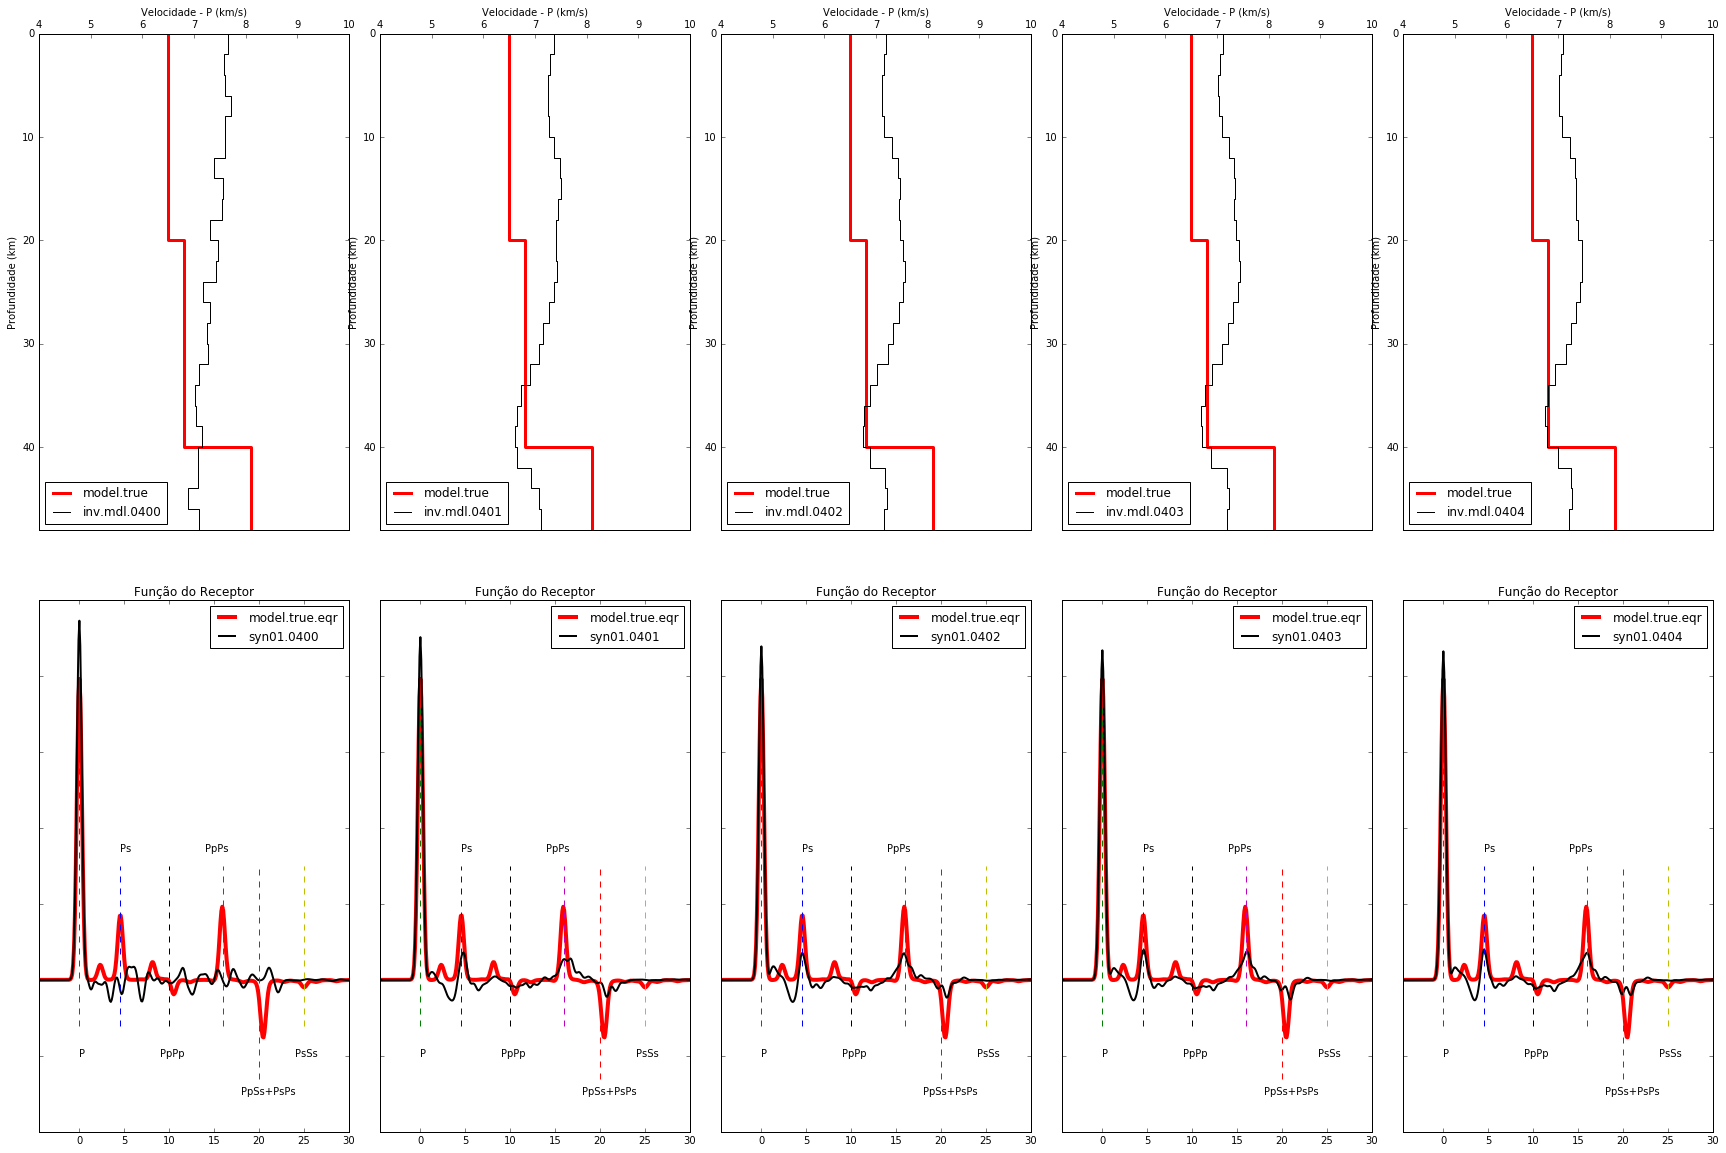

In [92]:
mpl.figure(figsize = (30,20))
gs1 = gridspec.GridSpec(2,len(vp_model))
gs1.update(wspace=0.1, hspace=0.1)
for i,j in enumerate(vp_model):
    ax1 = mpl.subplot(gs1[0,i])
    ax1.step(vp_true,H_true,'r',lw=3,where='post', label='model.true')
    ax1.step(j,H_model,'k',where='post',label=vp_modellabel[i])
    ax1.set_xlabel('Velocidade - P (km/s)')
    ax1.set_ylabel('Profundidade (km)')
    ax1.xaxis.tick_top()
    ax1.set_xlim([4,10])
    ax1.set_ylim([48,0])
    ax1.xaxis.set_label_position('top') 
    ax1.set_aspect(0.2)
    ax1.legend(loc=3)


for i,j in enumerate(FRsyn):
    ax2 = mpl.subplot(gs1[1,i],sharey=ax2)
    ax2.plot(FReqr25.times()-5,FReqr25.data,'r',lw=4,label='model.true.eqr')
    ax2.plot(j[0].times()-5,j[0].data,'k',lw=2,label=FRsynlabel[i])
    ax2.set_title('Função do Receptor')    
    ax2.axvline(x=0, ymin=0.2, ymax=0.8, ls='dashed',c='g')
    ax2.text(0, -0.1, 'P')
    ax2.axvline(x=4.5, ymin=0.2, ymax=0.5, ls='dashed',c='b')
    ax2.text(4.5, 0.17, 'Ps')
    ax2.axvline(x=10, ymin=0.2, ymax=0.5, ls='dashed',c='k')
    ax2.text(9, -0.1, 'PpPp')    
    ax2.axvline(x=16, ymin=0.2, ymax=0.5, ls='dashed',c='m')
    ax2.text(14, 0.17, 'PpPs')
    ax2.axvline(x=20, ymin=0.1, ymax=0.5, ls='dashed',c='r')    
    ax2.text(18, -0.15, 'PpSs+PsPs')
    ax2.axvline(x=25, ymin=0.2, ymax=0.5, ls='dashed',c='y')    
    ax2.text(24, -0.1, 'PsSs')
    ax2.set_xlim(-4.5,30)
    ax2.set_ylim(-0.2,0.5)
    ax2.legend(loc=0)
    mpl.setp(ax2.get_yticklabels(), visible=False)

<h4>Pela figura acima podemos ver que com as interações no processo de inversão pode-se estimar com mais detalhes o modelo inicial de acordo com avançar das interações. Essa melhora no cálculo do modelo inicial pode ser observada nas Funções do Receptor abaixo, pois quanto melhor o modelo, mais a Função do Receptoror invertida é mais semelhante a Função do Receptor verdadeira.<h4>